# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [25]:
test_city = 'London'
test_city_url = query_url+ test_city
london_json = requests.get(test_city_url).json()
print(json.dumps(london_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1686624602,
    "id": 2643743,
    "main": {
        "feels_like": 57.67,
        "humidity": 73,
        "pressure": 1013,
        "temp": 58.68,
        "temp_max": 62.35,
        "temp_min": 53.38
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1686627791,
        "sunset": 1686687476,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 2.3
    }
}


In [26]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather is our usual response variable
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bayan
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | nelson bay
Processing Record 5 of Set 1 | neuquen
Processing Record 6 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 7 of Set 1 | road town
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | minsk
Processing Record 11 of Set 1 | saurimo
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | coihaique
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | den helder
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | menongue
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | egvekinot
Processing Record 22 of Set 1 | mataura
Proces

Processing Record 37 of Set 4 | pangnirtung
Processing Record 38 of Set 4 | havre-saint-pierre
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | ndele
Processing Record 43 of Set 4 | nakhon sawan
Processing Record 44 of Set 4 | lata
Processing Record 45 of Set 4 | mandali
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | kushima
Processing Record 48 of Set 4 | birsk
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | nanortalik
Processing Record 1 of Set 5 | alice town
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | sagaing
Processing Record 5 of Set 5 | pozoblanco
Processing Record 6 of Set 5 | zhangye
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | devils lake
Processing Record 9 of Set 5 | makakilo city
Processing Record 10 of Set 5 | salalah
Pro

Processing Record 28 of Set 8 | huarmey
Processing Record 29 of Set 8 | kholodnyy
Processing Record 30 of Set 8 | hambantota
Processing Record 31 of Set 8 | lolua
City not found. Skipping...
Processing Record 32 of Set 8 | yaan
Processing Record 33 of Set 8 | cidreira
Processing Record 34 of Set 8 | gandia
Processing Record 35 of Set 8 | port augusta
Processing Record 36 of Set 8 | sawtell
Processing Record 37 of Set 8 | namatanai
Processing Record 38 of Set 8 | villazon
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | saint-pierre
Processing Record 42 of Set 8 | wahran
City not found. Skipping...
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | mporokoso
Processing Record 45 of Set 8 | cabo san lucas
Processing Record 46 of Set 8 | kuche
City not found. Skipping...
Processing Record 47 of Set 8 | kizukuri
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record

Processing Record 15 of Set 12 | shingu
Processing Record 16 of Set 12 | mamontovo
Processing Record 17 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 18 of Set 12 | atasu
Processing Record 19 of Set 12 | saint anthony
Processing Record 20 of Set 12 | ust-tsilma
Processing Record 21 of Set 12 | manakara
Processing Record 22 of Set 12 | reconquista
Processing Record 23 of Set 12 | nguru
Processing Record 24 of Set 12 | shyroke
Processing Record 25 of Set 12 | diapaga
Processing Record 26 of Set 12 | iquitos
Processing Record 27 of Set 12 | honningsvag
Processing Record 28 of Set 12 | saldanha
Processing Record 29 of Set 12 | college
Processing Record 30 of Set 12 | helong
Processing Record 31 of Set 12 | toccoa
Processing Record 32 of Set 12 | mahajanga
Processing Record 33 of Set 12 | angoche
Processing Record 34 of Set 12 | domoni
Processing Record 35 of Set 12 | keningau
Processing Record 36 of Set 12 | paradwip
City not found. Skipping...
Processing Record 37

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urucara,-2.5364,-57.7600,24.79,91,70,0.73,BR,1686624372
1,ushuaia,-54.8000,-68.3000,4.81,75,20,10.80,AR,1686624372
2,albany,42.6001,-73.9662,20.51,78,100,1.34,US,1686624110
3,cidreira,-30.1811,-50.2056,9.04,71,83,3.65,BR,1686624338
4,punta arenas,-53.1500,-70.9167,6.06,70,20,6.17,CL,1686624177


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,60.49,71,100,15.03,AU,1686624694
1,bayan,46.0833,127.4000,78.30,46,5,1.54,CN,1686624694
2,rikitea,-23.1203,-134.9692,71.98,65,8,6.13,PF,1686624694
3,nelson bay,-32.7167,152.1500,63.00,82,100,8.99,AU,1686624694
4,neuquen,-38.9516,-68.0591,30.09,86,0,0.00,AR,1686624694


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [30]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis_temp = city_data_df['Max Temp']
color = '#FE420F'


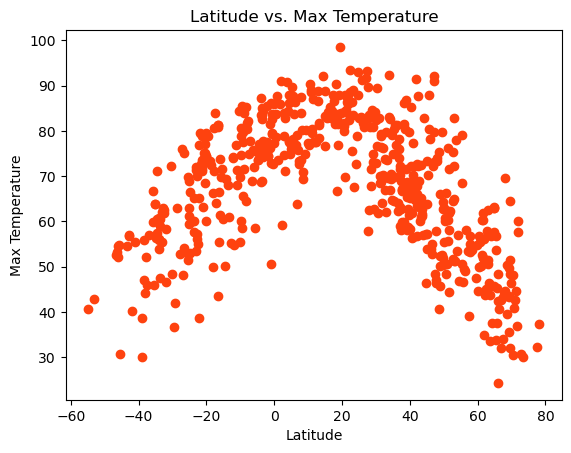

In [31]:
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_temp, color=color)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

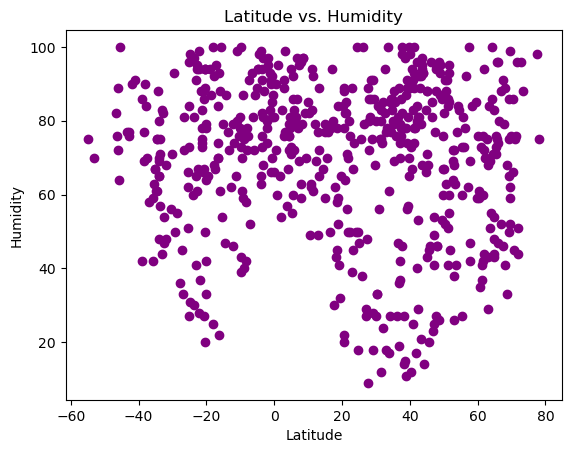

In [32]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
y_axis_humd = city_data_df['Humidity']
colour_humd = 'purple'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_humd, c=colour_humd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

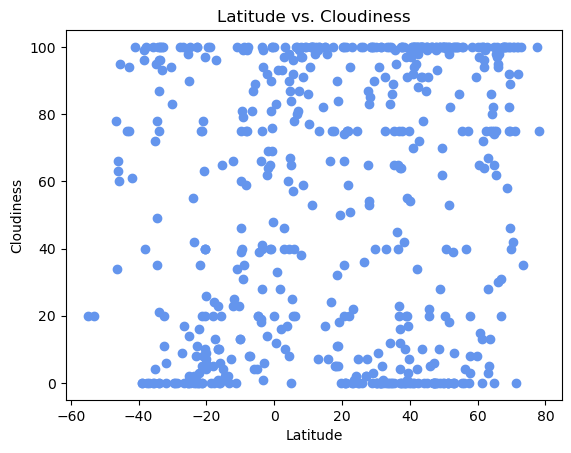

In [33]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
y_axis_cloud = city_data_df['Cloudiness']
color_cloud = 'cornflowerblue'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_cloud, c=color_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

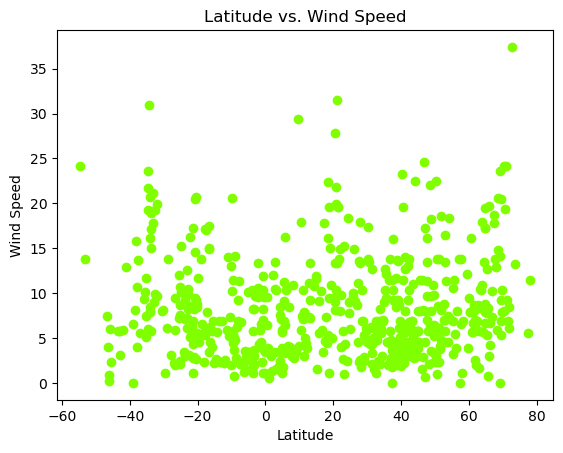

In [34]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y_axis_wind = city_data_df['Wind Speed']
color_wind = 'chartreuse'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_wind, c=color_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def line_regression(x_value, y_value):
    slope, intercept, r_value, p_value,  std_err = linregress(x_value, y_value)
    return slope, intercept, r_value, p_value, std_err

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) i think i'll use .loc 
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bayan,46.0833,127.4000,78.30,46,5,1.54,CN,1686624694
5,road town,18.4167,-64.6167,82.49,78,11,22.35,VG,1686624694
8,minsk,53.9000,27.5667,53.35,77,100,7.49,BY,1686624694
10,cherskiy,68.7500,161.3000,39.56,68,100,20.58,RU,1686624695
14,thompson,55.7435,-97.8558,46.56,81,100,11.50,CA,1686624695


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,60.49,71,100,15.03,AU,1686624694
2,rikitea,-23.1203,-134.9692,71.98,65,8,6.13,PF,1686624694
3,nelson bay,-32.7167,152.1500,63.00,82,100,8.99,AU,1686624694
4,neuquen,-38.9516,-68.0591,30.09,86,0,0.00,AR,1686624694
6,ushuaia,-54.8000,-68.3000,40.66,75,20,24.16,AR,1686624694


###  Temperature vs. Latitude Linear Regression Plot

In [38]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
north_x = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
north_slope, north_int, north_r, north_p, north_std_err = line_regression(north_x, north_temp)
north_temp_regress = north_slope*north_x + north_int
north_temp_slope_display = round(north_slope, 2)
north_temp_int_display = round(north_int, 2)
temp_eq_display = f"{north_temp_slope_display}x + {north_temp_int_display}"

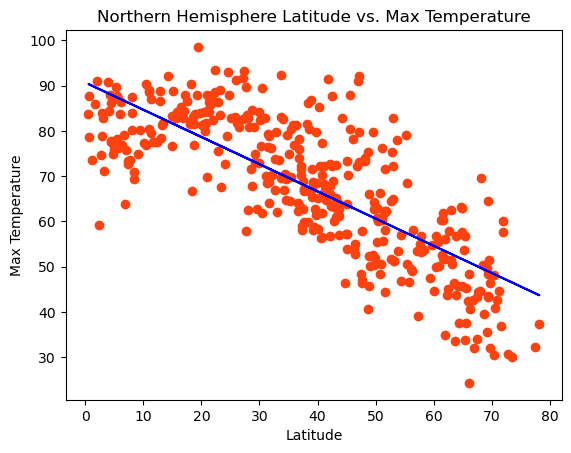

The r-value for Max Temperature in the NH: 0.5989814716520803.


In [39]:
plt.scatter(north_x, north_temp, color=color)
plt.plot(north_x, north_temp_regress, color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.annotate(temp_eq_display, (10, -20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for Max Temperature in the NH: {north_r**2}.')

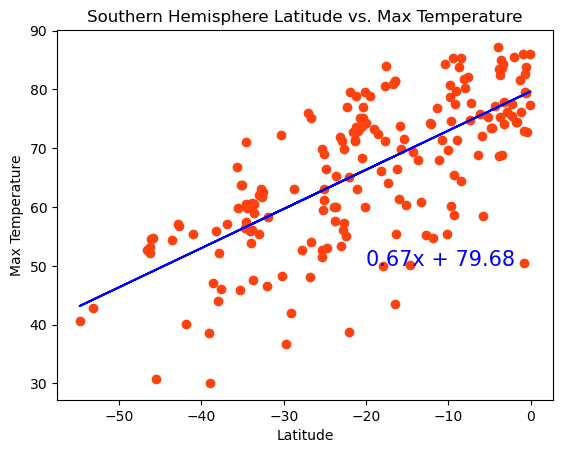

The r-value for Max Temp in the SH: 0.4833040150731225.


In [40]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
south_x = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
south_slope, south_int, south_r, south_p, south_std_err = line_regression(south_x, south_temp)
south_temp_regress = south_slope*south_x + south_int
south_temp_slope_display = round(south_slope, 2)
south_temp_int_display = round(south_int, 2)
south_temp_eq_display = f"{south_temp_slope_display}x + {south_temp_int_display}"

plt.scatter(south_x, south_temp, color=color)
plt.plot(south_x, south_temp_regress, color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.annotate(south_temp_eq_display, (-20, 50), fontsize=15, color='blue')
plt.show()
print(f'The r-value for Max Temp in the SH: {south_r**2}.')

**Discussion about the linear relationship:** Temperature progressivey decrease the further you get from the equator.

### Humidity vs. Latitude Linear Regression Plot

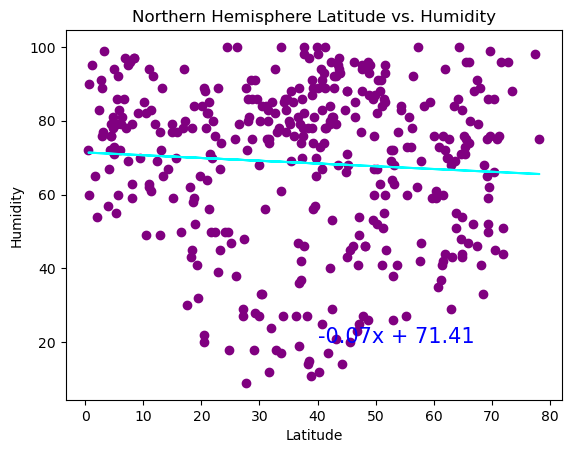

The r-value for the Humidity in the NH: 0.004488650830519149.


In [41]:
# Northern Hemisphere
# YOUR CODE HERE
colour_humd = 'purple'
north_humd = northern_hemi_df['Humidity']
north_slope_humd, north_int_humd, north_r_humd, north_p_humd, north_std_err_humd = line_regression(north_x, north_humd)
north_humd_regress = north_slope_humd*north_x + north_int_humd
north_humd_slope_display = round(north_slope_humd, 2)
north_humd_int_display = round(north_int_humd, 2)
humd_eq_display = f"{north_humd_slope_display}x + {north_humd_int_display}"

plt.scatter(north_x, north_humd, c=colour_humd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.plot(north_x, north_humd_regress, color='cyan')
plt.annotate(humd_eq_display, (40,20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Humidity in the NH: {north_r_humd**2}.')

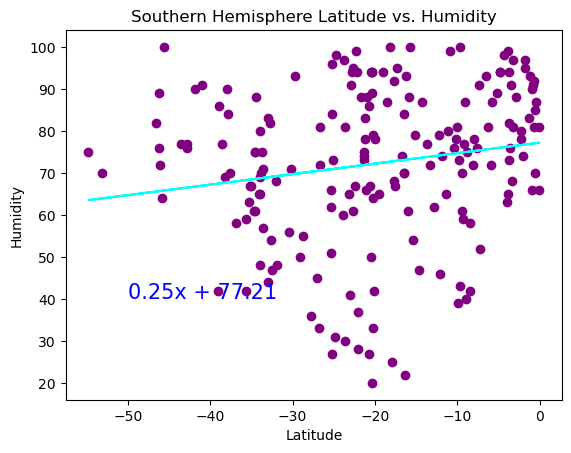

The r-value for the Humidity in the SH: 0.029938652313740825.


In [42]:
# Southern Hemisphere
# YOUR CODE HERE
south_humd = southern_hemi_df['Humidity']
south_slope_humd, south_int_humd, south_r_humd, south_p_humd, south_std_err_humd = line_regression(south_x, south_humd)
south_slope_humd, south_int_humd, south_r_humd, south_p_humd, south_std_err_humd = line_regression(south_x, south_humd)
south_humd_regress = south_slope_humd*south_x + south_int_humd
south_humd_slope_display = round(south_slope_humd, 2)
south_humd_int_display = round(south_int_humd, 2)
south_humd_eq_display = f"{south_humd_slope_display}x + {south_humd_int_display}"

plt.scatter(south_x, south_humd, c=colour_humd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.plot(south_x, south_humd_regress, color='cyan')
plt.annotate(south_humd_eq_display, (-50,40), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Humidity in the SH: {south_r_humd**2}.')

**Discussion about the linear relationship:** The closer you get to the equater, the temperture gradually increases

### Cloudiness vs. Latitude Linear Regression Plot

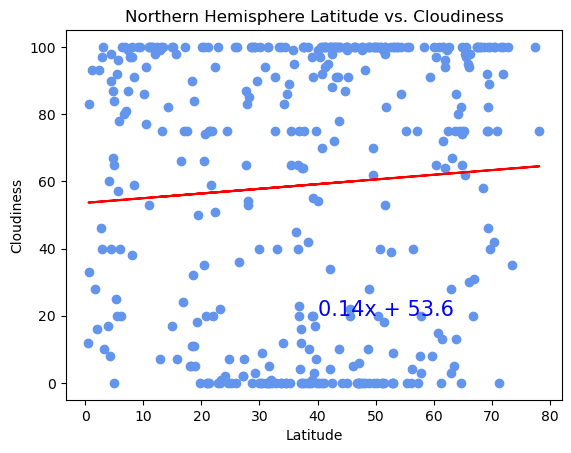

The r-value for the Cloudiness in the NH: 0.004627504996394876.


In [43]:
# Northern Hemisphere
# YOUR CODE HERE
colour_cloud = 'cornflowerblue'
north_cloud = northern_hemi_df['Cloudiness']
north_slope_cloud, north_int_cloud, north_r_cloud, north_p_cloud, north_std_err_cloud = line_regression(north_x, north_cloud)
north_cloud_regress = north_slope_cloud*north_x + north_int_cloud
north_cloud_slope_display = round(north_slope_cloud, 2)
north_cloud_int_display = round(north_int_cloud, 2)
cloud_eq_display = f"{north_cloud_slope_display}x + {north_cloud_int_display}"

plt.scatter(north_x, north_cloud, c=colour_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.plot(north_x, north_cloud_regress, color='red')
plt.annotate(cloud_eq_display, (40,20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Cloudiness in the NH: {north_r_cloud**2}.')

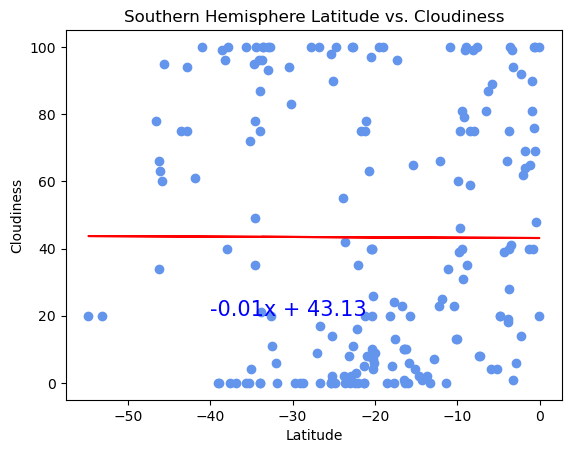

The r-value for the Cloudiness in the SH: 1.2937560945377811e-05.


In [44]:
# Southern Hemisphere
# YOUR CODE HERE
south_cloud = southern_hemi_df['Cloudiness']
south_slope_cloud, south_int_cloud, south_r_cloud, south_p_cloud, south_std_err_cloud = line_regression(south_x, south_cloud)
south_cloud_regress = south_slope_cloud*south_x + south_int_cloud
south_cloud_slope_display = round(south_slope_cloud, 2)
south_cloud_int_display = round(south_int_cloud, 2)
south_cloud_eq_display = f"{south_cloud_slope_display}x + {south_cloud_int_display}"

plt.scatter(south_x, south_cloud, c=colour_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.plot(south_x, south_cloud_regress, color='red')
plt.annotate(south_cloud_eq_display, (-40,20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Cloudiness in the SH: {south_r_cloud**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

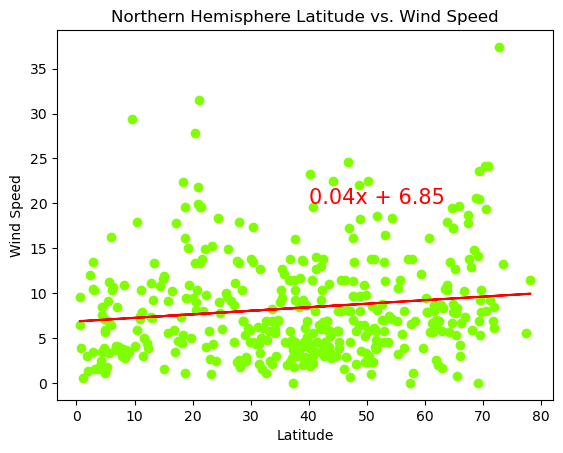

The r-value for the Wind Speed in the NH: 0.018433696748438106.


In [45]:
# Northern Hemisphere
# YOUR CODE HERE
colour_wind = 'chartreuse'
north_wind = northern_hemi_df['Wind Speed']
north_slope_wind, north_int_wind, north_r_wind, north_p_wind, north_std_err_wind = line_regression(north_x, north_wind)
north_wind_regress = north_slope_wind*north_x + north_int_wind
north_wind_slope_display = round(north_slope_wind, 2)
north_wind_int_display = round(north_int_wind, 2)
wind_eq_display = f"{north_wind_slope_display}x + {north_wind_int_display}"

plt.scatter(north_x, north_wind, c=colour_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.plot(north_x, north_wind_regress, color='red')
plt.annotate(wind_eq_display, (40,20), fontsize=15, color='red')
plt.show()
print(f'The r-value for the Wind Speed in the NH: {north_r_wind**2}.')

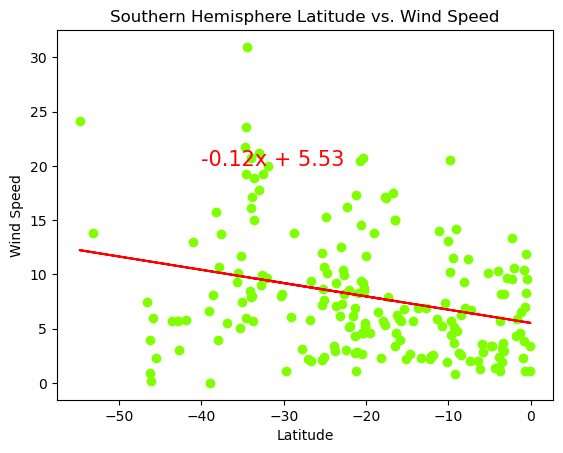

The r-value for the Wind Speed in the SH: 0.08026143213590738.


In [46]:
# Southern Hemisphere
# YOUR CODE HERE
south_wind = southern_hemi_df['Wind Speed']
south_slope_wind, south_int_wind, south_r_wind, south_p_wind, south_std_err_wind = line_regression(south_x, south_wind)
south_wind_regress = south_slope_wind*south_x + south_int_wind
south_wind_slope_display = round(south_slope_wind, 2)
south_wind_int_display = round(south_int_wind, 2)
south_wind_eq_display = f"{south_wind_slope_display}x + {south_wind_int_display}"

plt.scatter(south_x, south_wind, c=colour_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.plot(south_x, south_wind_regress, color='red')
plt.annotate(south_wind_eq_display, (-40,20), fontsize=15, color='red')
plt.show()
print(f'The r-value for the Wind Speed in the SH: {south_r_wind**2}.')

**Discussion about the linear relationship:** 
In the northern hemisphere, the relationship between wind speed and latitude does not exhibit any significant correlation. Conversely, in the southern hemisphere, we can perceive a slight inverse correlation.